### 1. 목표
- 버섯의 특징을 활용해 독/식용 버섯을 분류
- Decision tree 시각화 & 과대적합 속성 제어
- 특성선택(Feature selection) 해보기 

In [8]:
import pandas as pd

In [9]:
# 데이터 로드
data=pd.read_csv('mushroom.csv')
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [10]:
data.shape

(8124, 23)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [12]:
data.describe()
# 문자열 - 빈도수, 종류수, 높은 빈도수의 데이터, 개수

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


##### 데이터 분리(문제-X, 정답-y)

In [13]:
# poisonous 컬럼 (p-독버섯, e-식용버섯)

In [14]:
X = data.loc[:, 'cap-shape':]
y = data['poisonous']

In [15]:
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

In [16]:
data.head(2)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


##### 데이터 표현
- 연속형 : 숫자로 이루어진 순서가 있는 데이터
- 이산형 : 숫자가 아닌 이산적인 데이터(컴퓨터, 옷, 책 등)

##### 원-핫 인코딩
- 특성의 범주 갯수만큼 특성을 만들고, 해당하는 데이터에는 1, 나머지는 0으로 표시하는 방법

In [17]:
# 원-핫 인코딩 표기
X_one_hot=pd.get_dummies(X)
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [18]:
X_one_hot.shape

(8124, 117)

##### 모델링

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# 훈련, 테스트 데이터 나누기
X_train, X_test, y_train, y_test=train_test_split(X_one_hot, y, test_size=0.3)

In [21]:
print(X_train.shape)
print(X_test.shape)

(5686, 117)
(2438, 117)


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# 결정트리 모델 생성
tree_model=DecisionTreeClassifier()

In [24]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
tree_model.score(X_train, y_train)

1.0

In [26]:
tree_model.score(X_test, y_test)

1.0

시각화 패키지 설치

In [27]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.tree import export_graphviz

In [29]:
export_graphviz(tree_model, out_file='tree.dot',
                class_names=['독', '식용'],
                feature_names=X_one_hot.columns,
                impurity=False,
                filled=True)

In [30]:
import os
os.environ['PATH']+=os.pathsep+'C:/Program Files/Graphviz/bin'
os.environ

environ{'ALLUSERSPROFILE': 'C:\\ProgramData',
        'APPDATA': 'C:\\Users\\smhrd\\AppData\\Roaming',
        'APPLICATION_INSIGHTS_NO_DIAGNOSTIC_CHANNEL': '1',
        'CHROME_CRASHPAD_PIPE_NAME': '\\\\.\\pipe\\crashpad_20952_NPRUKMCWWRUNNFPK',
        'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
        'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
        'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
        'COMPUTERNAME': 'DESKTOP-1QKLF53',
        'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe',
        'CONDA_DEFAULT_ENV': 'base',
        'CONDA_EXE': 'C:\\Users\\smhrd\\anaconda3\\Scripts\\conda.exe',
        'CONDA_PREFIX': 'C:\\Users\\smhrd\\anaconda3',
        'CONDA_PROMPT_MODIFIER': '(base) ',
        'CONDA_PYTHON_EXE': 'C:\\Users\\smhrd\\anaconda3\\python.exe',
        'CONDA_ROOT': 'C:\\Users\\smhrd\\anaconda3',
        'CONDA_SHLVL': '1',
        'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData',
        'ELECTRON_RUN_A

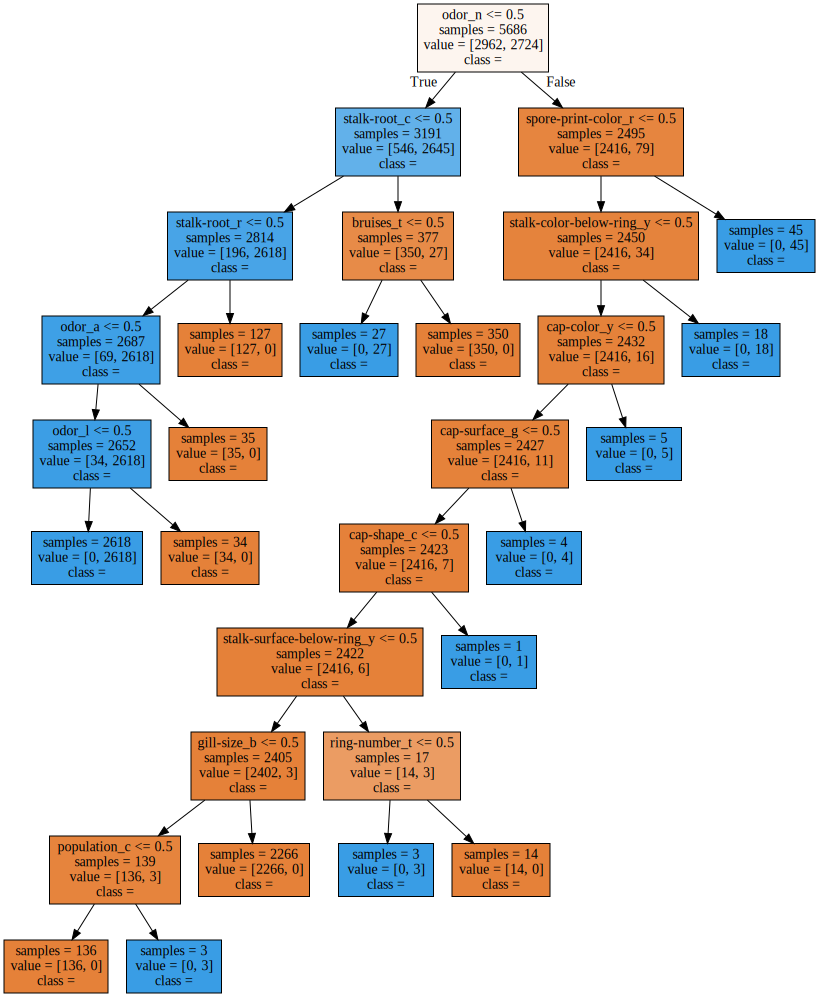

In [31]:
import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

##### 과대적합 제어

In [32]:
# max_depth
tree_model2=DecisionTreeClassifier( max_depth=1 )

In [33]:
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [48]:
export_graphviz(tree_model2, out_file='tree2.dot',
                class_names=['독', '식용'],
                feature_names=X_one_hot.columns,
                impurity=False,
                filled=True)

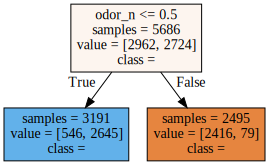

In [49]:
with open('tree2.dot', encoding='UTF8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [50]:
tree_model2.score(X_train, y_train)

0.8900809004572634

In [51]:
tree_model2.score(X_test, y_test)

0.8789991796554553

##### 특성중요도
- tree 모델의 특성 중요도

In [52]:
# 특성 중요도는 학습시킨 모델에게 있음
fi=tree_model.feature_importances_
fi

array([0.00000000e+00, 7.00940259e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.79798485e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.48453808e-03,
       0.00000000e+00, 1.76646549e-02, 2.37236135e-02, 0.00000000e+00,
       0.00000000e+00, 2.36531909e-02, 0.00000000e+00, 6.27152184e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.29919587e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.72769403e-01, 0.00000000e+00, 8.11270985e-02,
      

In [53]:
# 모델의 특성 중요도와 특성의 이름을 활용해 df생성
importance_df=pd.DataFrame(fi, index=X_one_hot.columns, columns=['features'])

In [54]:
# df 정렬
importance_df.sort_values(by='features', ascending=False).head(10)

,features
odor_n,0.627152
stalk-root_c,0.172769
stalk-root_r,0.081127
spore-print-color_r,0.030282
odor_a,0.023724
odor_l,0.023653
bruises_t,0.017665
stalk-color-below-ring_y,0.012427
cap-color_y,0.003485
cap-surface_g,0.002798
